In [1]:
import numpy as np
import pandas as pd
import glob
from datetime import date
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = glob.glob('*.csv')
df = pd.read_csv(filename[0])

df = df.iloc[:, :5]
df.drop(columns=['machine', 'timestamp'], inplace=True)

df = df.pivot_table('value', 'packet_timestamp', 'id')

df.index = df.index.astype(str).str[:-3].astype(np.int64)
df['date'] = df.index.map(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
df = df.set_index('date')

df.head()

id                   ApplicationTime  CycleTime  PartCode  PressureAvg_d1  \
date                                                                        
2021-03-14 14:34:07          14573.0    25345.0       0.0            79.0   
2021-03-14 17:02:51          14561.0    25393.0       0.0            79.0   
2021-03-14 17:03:50          14573.0    25345.0       0.0            75.0   
2021-03-14 17:04:58          14573.0    25357.0       0.0            74.0   
2021-03-14 17:15:11          14585.0    25381.0       0.0            75.0   

id                   PressureAvg_d2  PressureMax_d1  PressureMax_d2  \
date                                                                  
2021-03-14 14:34:07             0.0           109.0             0.0   
2021-03-14 17:02:51             0.0           109.0             0.0   
2021-03-14 17:03:50             0.0           103.0             0.0   
2021-03-14 17:04:58             0.0           101.0             0.0   
2021-03-14 17:15:11             0.0           104.0             0.0   

id                   TorqueAvg_d1  TorqueAvg_d2  VolumeCurrent  \
date                                                             
2021-03-14 14:34:07          44.0          13.0          27.05   
2021-03-14 17:02:51          42.0          11.0          27.01   
2021-03-14 17:03:50          40.0          10.0          27.31   
2021-03-14 17:04:58          42.0          13.0          27.29   
2021-03-14 17:15:11          40.0           9.0          27.47   

id                   VolumeDeviation  VolumeSet  
date                                             
2021-03-14 14:34:07            35.25       20.0  
2021-03-14 17:02:51            35.05       20.0  
2021-03-14 17:03:50            36.55       20.0  
2021-03-14 17:04:58            36.45       20.0  
2021-03-14 17:15:11            37.35       20.0

In [3]:
y = df.PressureMax_d1
y

date
2021-03-14 14:34:07    109.0
2021-03-14 17:02:51    109.0
2021-03-14 17:03:50    103.0
2021-03-14 17:04:58    101.0
2021-03-14 17:15:11    104.0
                       ...  
2021-04-01 12:42:00    112.0
2021-04-01 12:42:59    113.0
2021-04-01 12:43:33    120.0
2021-04-01 12:44:31    121.0
2021-04-01 12:45:32    121.0
Name: PressureMax_d1, Length: 9736, dtype: float64

In [4]:
y[5000:]

date
2021-03-25 06:49:52    131.0
2021-03-25 06:50:50    132.0
2021-03-25 06:51:39    132.0
2021-03-25 06:52:47    149.0
2021-03-25 06:53:28    196.0
                       ...  
2021-04-01 12:42:00    112.0
2021-04-01 12:42:59    113.0
2021-04-01 12:43:33    120.0
2021-04-01 12:44:31    121.0
2021-04-01 12:45:32    121.0
Name: PressureMax_d1, Length: 4736, dtype: float64

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
model = ARIMA(y, order=(1,1,1))
results = model.fit()

C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


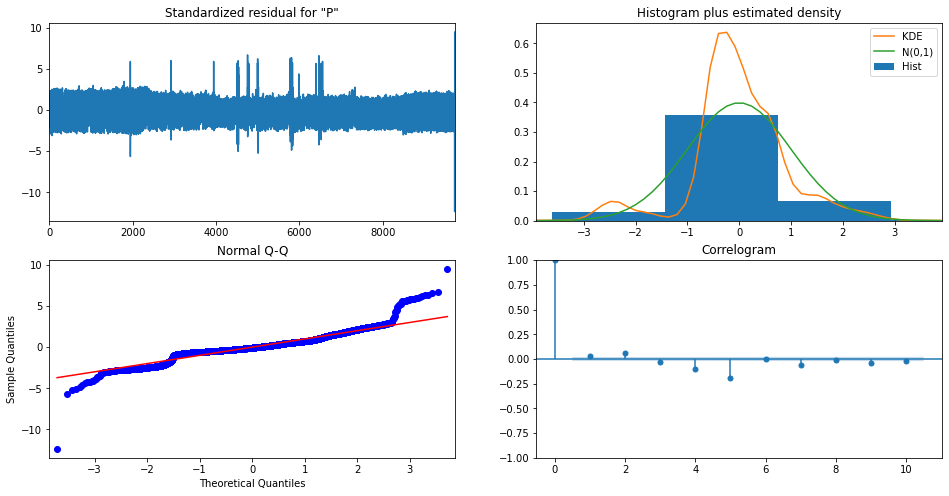

In [7]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [8]:
pred = results.get_prediction(start=pd.to_datetime('2021-03-25 06:53:28'),dynamic=False)
pred_ic = pred.conf_int()
pred_ic

lower PressureMax_d1  upper PressureMax_d1
date                                                           
2021-03-25 06:53:28            124.154211            163.967677
2021-03-25 06:54:32            152.776291            192.589757
2021-03-25 06:55:34            154.811791            194.625257
2021-03-25 06:56:39            121.590436            161.403901
2021-03-25 06:57:39            131.949598            171.763064
...                                   ...                   ...
2021-04-01 12:42:00             95.183483            134.996949
2021-04-01 12:42:59             94.556504            134.369969
2021-04-01 12:43:33             95.142197            134.955663
2021-04-01 12:44:31             99.379812            139.193278
2021-04-01 12:45:32             99.994309            139.807774

[4732 rows x 2 columns]

In [9]:
y.tail()

date
2021-04-01 12:42:00    112.0
2021-04-01 12:42:59    113.0
2021-04-01 12:43:33    120.0
2021-04-01 12:44:31    121.0
2021-04-01 12:45:32    121.0
Name: PressureMax_d1, dtype: float64

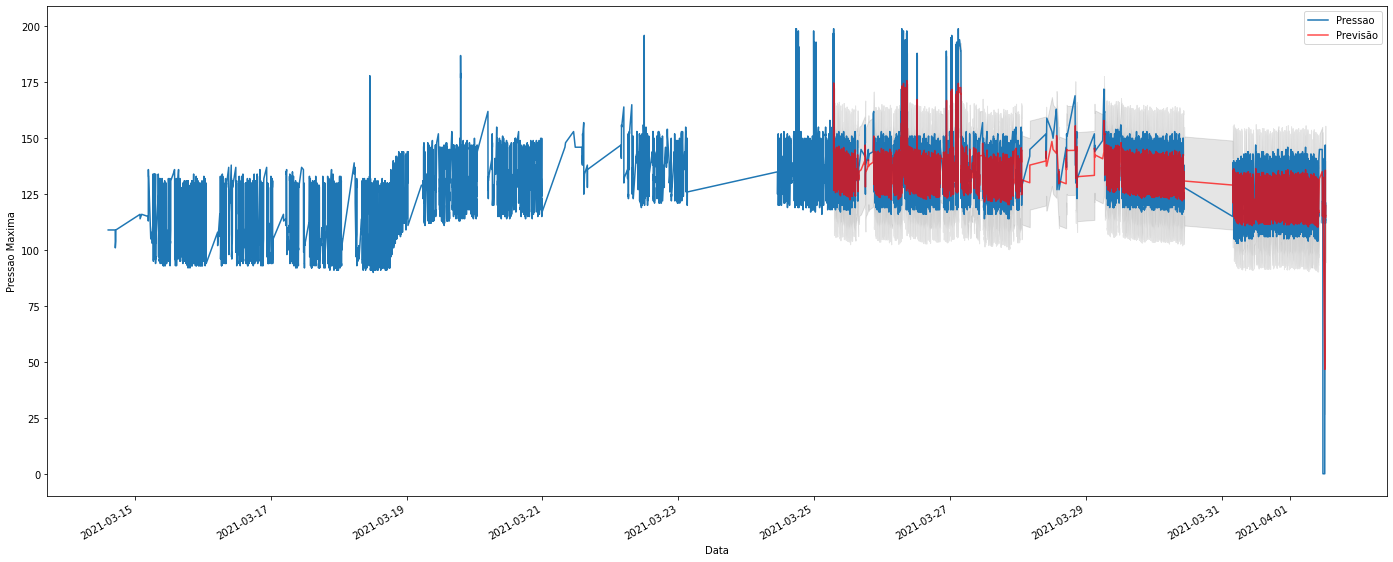

In [10]:
ax = y['2020':].plot(label='Pressao')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(24, 10))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Pressao Maxima')
plt.legend()
plt.show()

## Media Movel

In [11]:
y_mm = df.PressureMax_d1.rolling(100).mean()
y_mm.head()

date
2021-03-14 14:34:07   NaN
2021-03-14 17:02:51   NaN
2021-03-14 17:03:50   NaN
2021-03-14 17:04:58   NaN
2021-03-14 17:15:11   NaN
Name: PressureMax_d1, dtype: float64

In [12]:
model = ARIMA(y_mm, order=(0,1,1))
results = model.fit()

C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\allan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


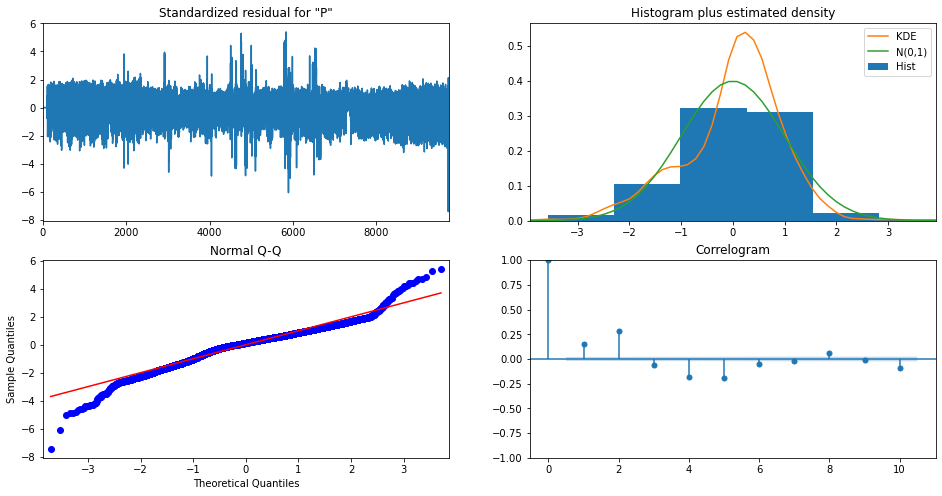

In [13]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2021-03-25 06:53:28'),dynamic=False)
pred_ic = pred.conf_int()
pred_ic

lower PressureMax_d1  upper PressureMax_d1
date                                                           
2021-03-25 06:53:28            136.593292            137.207642
2021-03-25 06:54:32            137.319278            137.933628
2021-03-25 06:55:34            137.974161            138.588511
2021-03-25 06:56:39            137.771091            138.385441
2021-03-25 06:57:39            138.237628            138.851978
...                                   ...                   ...
2021-04-01 12:42:00            117.028041            117.642391
2021-04-01 12:42:59            117.081824            117.696173
2021-04-01 12:43:33            117.145220            117.759569
2021-04-01 12:44:31            117.311598            117.925948
2021-04-01 12:45:32            117.421729            118.036078

[4732 rows x 2 columns]

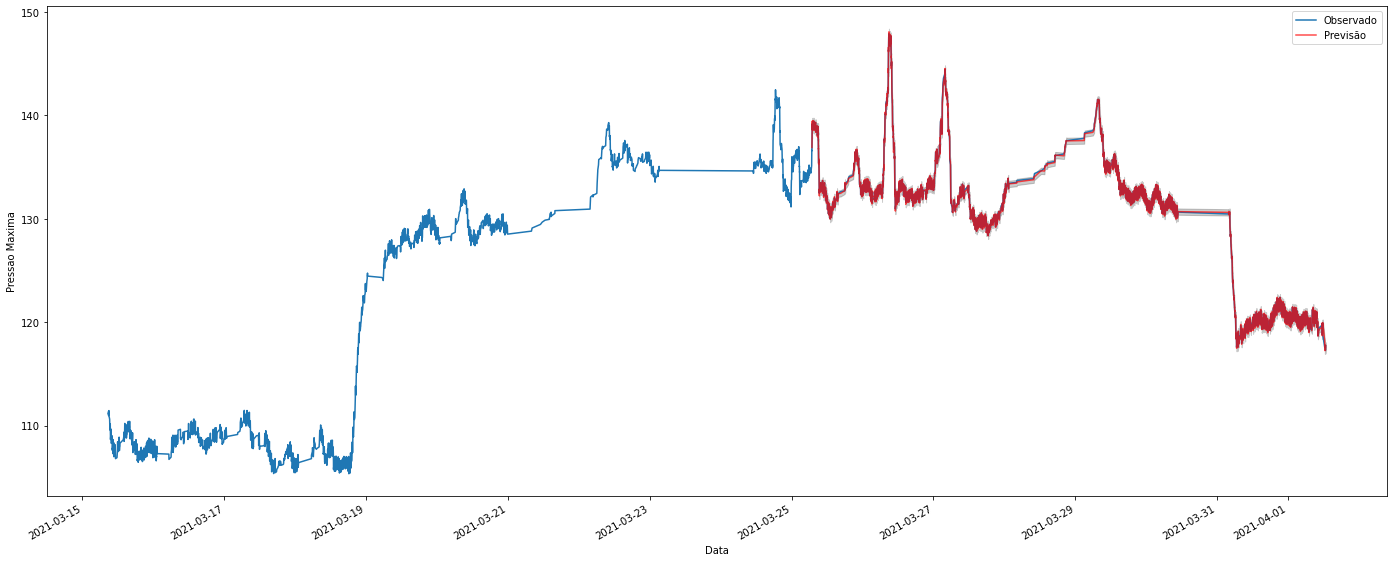

In [17]:
ax = y_mm['2020':].plot(label='Observado')
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(24,10))
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k',alpha=0.2)
ax.set_xlabel('Data')
ax.set_ylabel('Pressao Maxima')
plt.legend()
plt.show()

In [18]:
pred.predicted_mean

date
2021-03-25 06:53:28    136.900467
2021-03-25 06:54:32    137.626453
2021-03-25 06:55:34    138.281336
2021-03-25 06:56:39    138.078266
2021-03-25 06:57:39    138.544803
                          ...    
2021-04-01 12:42:00    117.335216
2021-04-01 12:42:59    117.388998
2021-04-01 12:43:33    117.452395
2021-04-01 12:44:31    117.618773
2021-04-01 12:45:32    117.728903
Name: predicted_mean, Length: 4732, dtype: float64